In [117]:
import sys
sys.path
import api
import group
import json

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  


In [118]:
CLIENT = api.GroupmeClient()

In [119]:
groups = CLIENT.get_groups()["response"]

In [120]:
sep_dict = None
for g in groups:
    if g["name"] == "SEP Actives":
        sep_dict = g

In [121]:
sep = group.Group(sep_dict["id"])
sep

In [122]:
# messages = CLIENT.get_all_group_messages(sep_dict["id"])
with open("hello.json","r") as fp:
    messages = json.load(fp)

In [123]:
len(messages)

23716

In [124]:
# with open("hello.json", "w") as fp:
#     json.dump(messages, fp, indent=4)

In [125]:
id_to_name = dict()
likes_given = dict()
likes_received = dict()
messages_posted = dict()

for message in messages:
    likes = message["favorited_by"]
    poster = message["sender_id"]
    poster_name = message["name"]
    if poster not in id_to_name:
        id_to_name[poster] = poster_name
    if poster not in messages_posted:
        messages_posted[poster] = 0
    messages_posted[poster] += 1
    
    for like in likes:
        if poster not in likes_received:
            likes_received[poster] = 0
        if like not in likes_given:
            likes_given[like] = 0
        likes_received[poster] += 1
        likes_given[like] += 1

likes_given = {id_to_name[name] : val for name,val in likes_given.items() if name in id_to_name}
likes_received = {id_to_name[name] : val for name,val in likes_received.items() if name in id_to_name}
messages_posted = {id_to_name[name] : val for name,val in messages_posted.items() if name in id_to_name}

received_to_given = {name : received*1.0/likes_given[name] for name,received in likes_received.items() if name in likes_given}
likes_per_message = {name : received*1.0/messages_posted[name] for name,received in likes_received.items() if name in messages_posted}

In [134]:
def graph_dict(curr_dict):
    names = curr_dict.keys()
    names = sorted(names, key=lambda name:-curr_dict[name])
    names = names[:]
    vals = [curr_dict[key] for key in names]

    df = pd.DataFrame({"names" : names, "vals" : vals})
    df.plot(kind="bar", x="names", y="vals", figsize=(15,15))

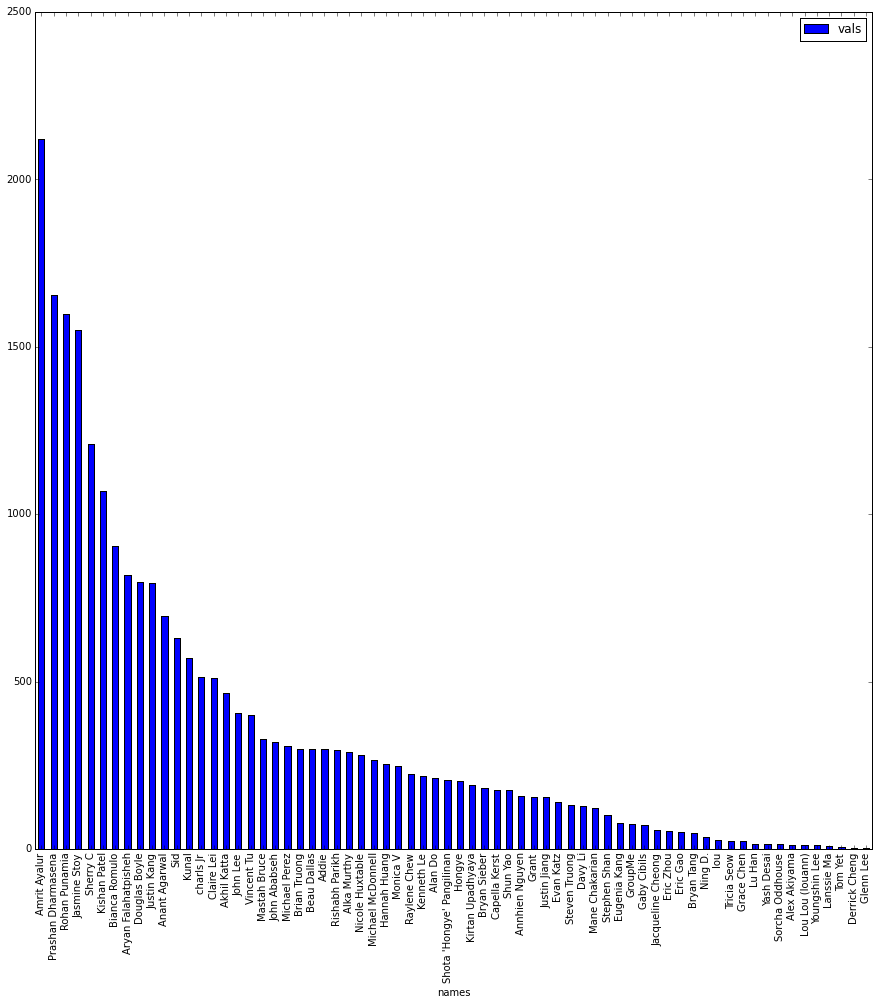

In [138]:
graph_dict(messages_posted)